In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Scatter Plot of relationship between tweet volume and volatility

Using TSLA

In [19]:
tweets_df = pd.read_csv('../tweets-data/stock_tweets.csv')

price_df = pd.read_csv('../stock-data/TSLA.csv', skiprows=[1, 2])
price_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df['Volatility'] = (price_df['High'] - price_df['Low']) / price_df['Open']

# Load tweet data
tweet_df = tweets_df[tweets_df['Stock Name'] == 'TSLA'].copy()
tweet_df['Date'] = pd.to_datetime(tweet_df['Date']).dt.date
tweet_counts = tweet_df.groupby('Date').size().reset_index(name='TweetCount') # Create df of number of tweets per day
tweet_counts['Date'] = pd.to_datetime(tweet_counts['Date'])
tweet_counts = tweet_counts[tweet_counts['Date'].isin(price_df['Date'])] # Get rid of tweet count info on non-trading days

# Merge
merged = pd.merge(tweet_counts, price_df[['Date', 'Volatility']], on='Date', how='inner')

In [20]:
merged

,Date,TweetCount,Volatility
0,2021-09-30,90,0.018092
1,2021-10-01,94,0.022084
2,2021-10-04,119,0.038732
3,2021-10-05,88,0.029447
4,2021-10-06,78,0.017315
...,...,...,...
247,2022-09-23,86,0.041259
248,2022-09-26,72,0.050693
249,2022-09-27,85,0.039318
250,2022-09-28,75,0.040377


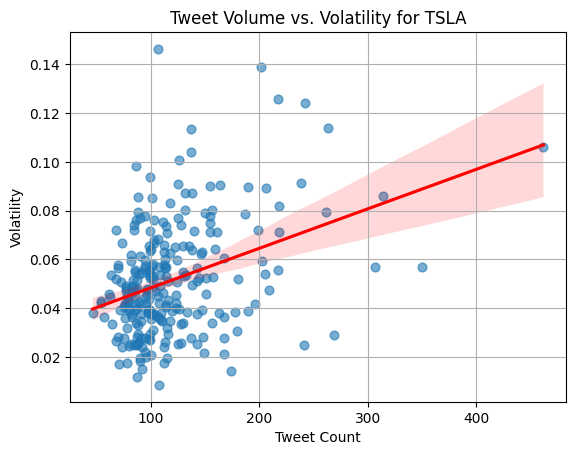

In [35]:
plt.figure()
sns.regplot(data=merged, x="TweetCount", y="Volatility", scatter_kws={"s": 40, "alpha": 0.6}, line_kws={"color": "red"})
plt.title(f"Tweet Volume vs. Volatility for TSLA")
plt.xlabel("Tweet Count")
plt.ylabel("Volatility")
plt.grid(True)
plt.savefig("TSLA_volume_vs_volatility_plot")

### 2. Heatmap: Same-day and Lagged Correlations

In [25]:
results_df = pd.read_csv('correlation_results.csv')
corr_matrix = results_df.set_index("Ticker")[["SameDayCorr", "LaggedCorr"]]

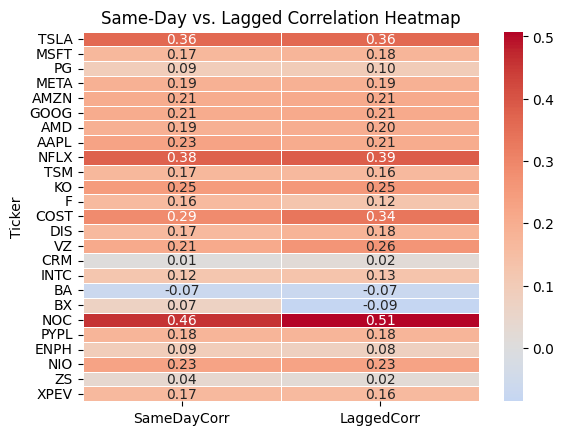

In [38]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Same-Day vs. Lagged Correlation Heatmap")
plt.savefig("same_day_vs_lagged_heatmap")

### 3. Time Series Line Plot for Tweet Volume and Volatility

Using TSLA

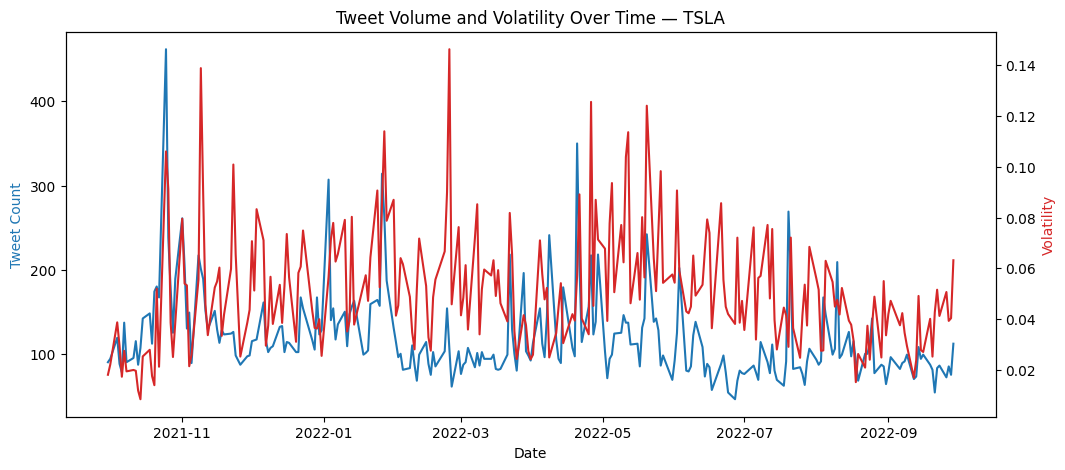

In [41]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
ax1.plot(merged["Date"], merged["TweetCount"], color="tab:blue", label="Tweet Count")
ax2.plot(merged["Date"], merged["Volatility"], color="tab:red", label="Volatility")

ax1.set_xlabel("Date")
ax1.set_ylabel("Tweet Count", color="tab:blue")
ax2.set_ylabel("Volatility", color="tab:red")

plt.title(f"Tweet Volume and Volatility Over Time — TSLA")

plt.savefig("time_series_tweet_and_volatility_lineplot")

### 4. Scatter Plot for NOC

In [43]:
tweets_df = pd.read_csv('../tweets-data/stock_tweets.csv')

price_df = pd.read_csv('../stock-data/NOC.csv', skiprows=[1, 2])
price_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df['Volatility'] = (price_df['High'] - price_df['Low']) / price_df['Open']

# Load tweet data
tweet_df = tweets_df[tweets_df['Stock Name'] == 'NOC'].copy()
tweet_df['Date'] = pd.to_datetime(tweet_df['Date']).dt.date
tweet_counts = tweet_df.groupby('Date').size().reset_index(name='TweetCount') # Create df of number of tweets per day
tweet_counts['Date'] = pd.to_datetime(tweet_counts['Date'])
tweet_counts = tweet_counts[tweet_counts['Date'].isin(price_df['Date'])] # Get rid of tweet count info on non-trading days

# Merge
merged = pd.merge(tweet_counts, price_df[['Date', 'Volatility']], on='Date', how='inner')

In [44]:
merged

,Date,TweetCount,Volatility
0,2021-10-07,1,0.015476
1,2021-10-08,1,0.023276
2,2021-11-03,1,0.014999
3,2021-12-02,1,0.022759
4,2022-01-14,1,0.020439
5,2022-01-26,2,0.023750
6,2022-02-02,1,0.018155
7,2022-02-25,1,0.045101
8,2022-02-28,2,0.070020
9,2022-03-02,1,0.047546


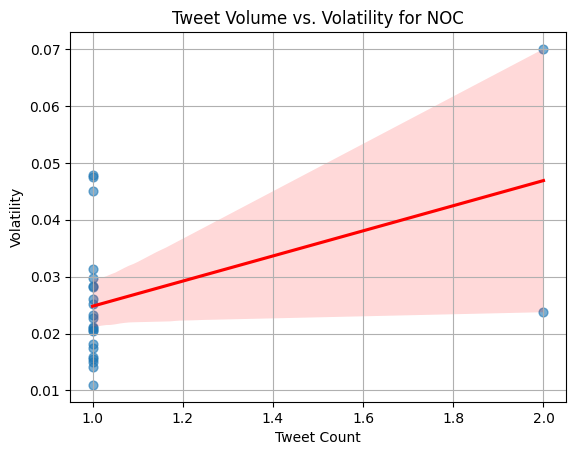

In [45]:
plt.figure()
sns.regplot(data=merged, x="TweetCount", y="Volatility", scatter_kws={"s": 40, "alpha": 0.6}, line_kws={"color": "red"})
plt.title(f"Tweet Volume vs. Volatility for NOC")
plt.xlabel("Tweet Count")
plt.ylabel("Volatility")
plt.grid(True)
plt.savefig("NOC_volume_vs_volatility_plot")